# Analiza wpływu wybranych czynników na ocenę jakości wina na przykładzie gatunku „Vinho verde”

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np
import seaborn_qqplot as sqp
from seaborn_qqplot import pplot
from scipy.stats import gamma
from scipy.stats import normaltest
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB

## Wstęp
### Opis zbioru danych
Zbiór danych pochodzi z 2009 roku i zawiera informacje dotyczące portugalskich czerwonych 
win „Vinho verde”. Vinho verde to produkt z regionu Minho (północno-zachodnia 
Portugalia). Ma umiarkowaną zawartość alkoholu i jest cenione ze względu na orzeźwiający 
smak. Dane zostały zebrane przez portugalskich badaczy oraz odpowiednio skorygowane 
i dopasowane do przeprowadzanego badania.

In [18]:
#dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality
df=pd.read_csv('C:/Users/Wiki/Desktop/Projekt 2 SAD/redwine.xls')

In [19]:
df.round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,1.00,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5
1595,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6
1597,5.9,0.64,0.12,2.0,0.08,32.0,44.0,1.00,3.57,0.71,10.2,5


#### Zmienne: 
* Fixed acidity = Kwasowość stała – Wskazuje poziom kwasu winnego i jabłkowego w winie. Ich zawartość w winie zależy od odmiany winogron, rocznika, ale też sposobu fermentacji wina.
* Volatile acidity = Kwasowość lotna – Odpowiada za poziom kwasu octowego w winie.Normalny poziom stężenia kwasu octowego w winie powinien wahać się od 0.03% do 0.06%.
* Citric acid = Kwas cytrynowy – Opisuje poziom zawartości kwasu cytrynowego. 
* Residual sugar = Cukier resztkowy – Informuje o poziomie zawartości cukru resztkowego. Cukier resztkowy to cukier, który pozostaje w winie po zakończeniu procesu fermentacji. Przyjmuje się, że gdy cukier resztkowy występuje w ilości do 4 g/l to wino możemy nazywać winem wytrawnym. 
* Chlorides = Chlorki – Wskazuje na poziom zawartości ezymów dodawanych do wina.
* Free sulfur dioxide = Wolny dwutlenek siarki – Odpisuje zawartość wolnych związków siarki. Siarka w winie odpowiada za przedłuzenie trwałości produktu. Większą zawartością siarki cechują się wina czerwone, które są analizowane w zbiorze danych.
* Total sulfur dioxide = Dwutlenek siarki ogółem – Wskazuje na łączną zawartość związków siarki, która odpowiada za trwałość produktu.
* Density = Gęstość – Gęstość badanego nie jest zróżnicowana, a jej wartość jest zbliżona do gęstości wody.
* pH = pondus Hydrogenii – Jest to rodzaj miary stopnia kwasowości danego roztworu.Odczyn pH w winie, powinien wynosić 2.8-4.
* Sulphates = Siarczany – Opisuje poziom zawartości siarczanów w winie.
* Alcohol = Zawartość alkoholu – Odpowiada za poziom zawartości alkoholu w winie. Powinna być wartością z przedziału 8.5% do 15%.
* Quality = Jakość - zmienna objaśniana za pomocą pozostałych zmiennych.  

Aby ograniczyć liczbę badanych zmiennych zmienne dotyczące kwasowości połączono ze sobą. Utworzono zmienną acidity, która jest średnią wartością dla obu zmiennych.   
Analogicznie zrobiono ze zmiennymi dotyczącymi siarki.

In [17]:
#część kolumn łączę ze sobą, aby zmniejszyć liczbę zmiennych
df['acidity'] = df[['fixed acidity','volatile acidity']].mean(axis=1).astype(float)
df['dioxide'] = df[['free sulfur dioxide','total sulfur dioxide']].mean(axis=1).astype(float)

#usuwam kolumny
df = df.drop(columns=['fixed acidity','volatile acidity','free sulfur dioxide','total sulfur dioxide'])

df.round(2)

,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,acidity,dioxide
0,0.00,1.9,0.08,1.00,3.51,0.56,9.4,5,4.05,22.5
1,0.00,2.6,0.10,1.00,3.20,0.68,9.8,5,4.34,46.0
2,0.04,2.3,0.09,1.00,3.26,0.65,9.8,5,4.28,34.5
3,0.56,1.9,0.08,1.00,3.16,0.58,9.8,6,5.74,38.5
4,0.00,1.9,0.08,1.00,3.51,0.56,9.4,5,4.05,22.5
...,...,...,...,...,...,...,...,...,...,...
1594,0.08,2.0,0.09,0.99,3.45,0.58,10.5,5,3.40,38.0
1595,0.10,2.2,0.06,1.00,3.52,0.76,11.2,6,3.22,45.0
1596,0.13,2.3,0.08,1.00,3.42,0.75,11.0,6,3.40,34.5
1597,0.12,2.0,0.08,1.00,3.57,0.71,10.2,5,3.27,38.0


### Statystyki
Zbiór danych składa się 12 zmiennych (po wprowadzeniu powyższych zmian 10), z których docelowo do badania zostanie zastosowane kilka najlepiej dopasowanych.  
Aby wybrać odpowiednio zróżnicowane i niosące możliwie najwięcej informacji zmienne przygotowano zestawienie statystyk dla każdej ze zmiennych.  

#### Opis statystyk
Zaprezentowane poniżej statystyki wskazują na obszary, w których można przeprowadzić analizę.  
Jednymi z najbardziej istotnych i miarodajnych statystyk powinny być zarówno średnia oraz odchylenie standardowe, które są składowymi potrzebnymi do obliczenia współczynnika zmienności, jak i również wartości minimalne i maksymalne osiągane przez zmienne.  
Odpowiednie wartości kwantyli mogą nieść informację odnośnie rozłożenia wartości w obserwacjach. 

In [20]:
#statystyki
stats=round(df.describe(),2)
stats.loc["std"]=round(stats.loc["std"],2)
stats.loc["mean"]=round(stats.loc["mean"],2)
stats.loc["cv"] = round(stats.loc["std"]/stats.loc["mean"],2)

stats.round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00
cv,0.21,0.34,0.70,0.56,0.56,0.66,0.71,0.00,0.05,0.26,0.10,0.14


Statystyki dla zmiennych powiązanych z kwasowością (fixed acidity, volatile acidity, citrcic acid) wykazują się dużą zmiennością ze względu na wartość współczynnika zmienności oraz znaczącą rozbieżność w obserwacjach (różnica pomiędzy statystyką min i max).  
Statystyka opisująca zawartość cukru resztkowego (zmienna residual sugar) wskazuje na średnią zawartość cukru równą 2.54 gramów o odchyleniu równym 1.14 gramów. Zawartość cukrów do 4 gramów oznacza, że zdecydowana większość badanych win jest wytrawna.  
Jednak wartość maksymalna równa 15.5 informuje, że wśród obserwacji znajdują się również dane dotyczące win półsłodkich lub słodkich. 
Dane dotyczące zmiennej chlorides wskazują na zawartość enzymów od 1.2% aż do 61%. Jednak na podstawie wyliczonych kwantyli można zauważyć, że znaczna większość obserwacji sięga maksymalnie 9%. Wartości odstające mogą świadczyć o błędach pomiaru, pomyłkach w przygotowaniu danej partii wina lub specyfice danego gatunku wina.  
Statystyki dla zmiennych związanych z zawartością siarki (free sulfur dioxide, total sulfur dioxide) również wykazują się bardzo wysoką zmiennością. Jednak w przypadku tych zmiennych dużą rolę może odgrywać występowanie wartości odstających. W obu zmiennych wartość maksymalna znacząco różni się od wartości kwartyla 75%.  
Zmienna opisująca zawartość siarczanów sulphates wskazuje na umiarkowaną zmienność, a statystyka średniej i odchylenia wskazuje na stosunkowo małe wartości tej zmiennej w badanym zbiorze danych.  
Statystyki dotyczące gęstości (density) jasno wskazują, na jednolitość w gęstości badanych win. Wartość zmiennej waha się między 0.9907 a 1.0037, a jej współczynnik zmienności wskazuje niemalże brak zmian. Zmienna nie wnosi istotnych informacji, więc nie będzie używana w dalszej analizie. 
Zmienna pH opisująca stopień kwasowości przyjmuje wartości z przedziału od 2.74 do 4.01, co jest charakterystyczne dla wina. Wartości zmiennej nie są zróżnicowane, a sama zmienna nie wnosi istotnych zależności do badania, więc nie będzie używana do budowania modelu.  
Zmienna alcohol wskazuje na zawartość alkoholu w zakresie 8.4%-14.9%. Wartości przyjmowane przez zmienna są standardowe dla win. Statystyki nie wskazują na wartości odstające, więc wszystkie badane napoje są klasyfikowane jako wina.  
Quality jest zmienną zależną od pozostałych zmiennych. Mimo iż jej wartości mogłyby wynosić od 1 do 10, dla badanych obserwacji zmienna przyjmuje wartości od 3 do 8. Średnia ocena jakości wynosi 5.64, a jej średnie odchylenie jest mniejsze niż 1. Statystyki wskazują, że w badanym zbiorze danych wina są klasyfikowane jako przeciętnej jakości. Wśród obserwacji brakuje danych o winach złej oraz znakomitej jakości.  

#### Współczynnik zmienności
Współczynnik zmienności – jest to szeroko stosowany w statystyce parametr określający miarę zróżnicowania cechy. Należy on do kategorii względnych miar zmienności. Współczynnik zmienności pozwala ocenić siłę zróżnicowania danej zbiorowości statystycznej wykazując siłę zmiennej, a także ocenia średnią arytmetyczną. Wysoka wartość współczynnika świadczy o silnym zróżnicowaniu, i odwrotnie.

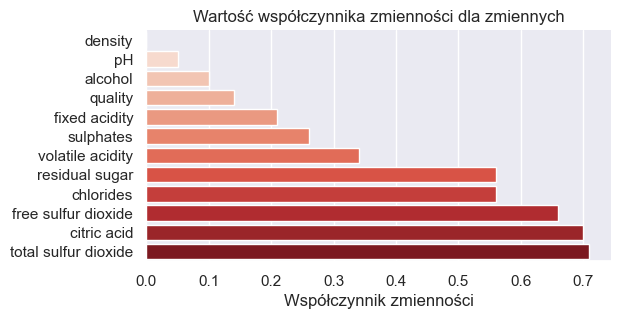

In [21]:
#wykres słupkowy - współczynniki zmienności
def cv_chart(df):
    #statystyki
    stats=df.describe()
    stats.loc["std"]=round(stats.loc["std"],2)
    stats.loc["mean"]=round(stats.loc["mean"],2)
    stats.loc["cv"] = round(stats.loc["std"]/stats.loc["mean"],2)

#wykres współczynnika zmienności
data = stats.transpose()["cv"]
data=data.sort_values()
sns.set(rc={"figure.figsize":(6, 3)})
sns.set_style('darkgrid')
sns.barplot(y=data.index, x=data.values,palette="Reds")
plt.title('Wartość współczynnika zmienności dla zmiennych')
plt.xlabel('Współczynnik zmienności')
sns.despine()
plt.show()

Za współczynnik zmienności wskazujący na odpowiednie zróżnicowanie modelu przyjęto 
10%. Z tego powodu zmienne density oraz pH zostały uznane za niewystarczająco 
zróżnicowane.  
Zestaw zmiennych poddano dalszej analizie i przygotowano dla nich wykresy zależności 
między sobą wzajemnie oraz macierz korelacji.

In [22]:
#usuwam kolumny
df = df.drop(columns=['density','pH'])

df.round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.58,10.5,5
1595,5.9,0.55,0.10,2.2,0.06,39.0,51.0,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.08,29.0,40.0,0.75,11.0,6
1597,5.9,0.64,0.12,2.0,0.08,32.0,44.0,0.71,10.2,5


### Wartości odstające
Obserwacje odstające (ang. outliers) – obserwacje relatywnie odległe od pozostałych elementów próby. Obserwacje odstające mogą odzwierciedlać rzeczywisty rozkład lub być rezultatem przypadku, ale mogą świadczyć też o błędnym pomiarze czy pomyłkach we wprowadzaniu informacji do bazy danych.  
Obserwacje odstające powstałe na skutek błędów w danych utrudniają i w skrajnym przypadku uniemożliwiają analizę. Szczególnie mało odporne na nie są metody i współczynniki bazujące na założeniu rozkładu normalnego i zależnościach liniowych.  
Poniżej przedstawiono wykresy pudełkowe ilustrujące ilość wartości odstających dla poszczególnych zmiennych.

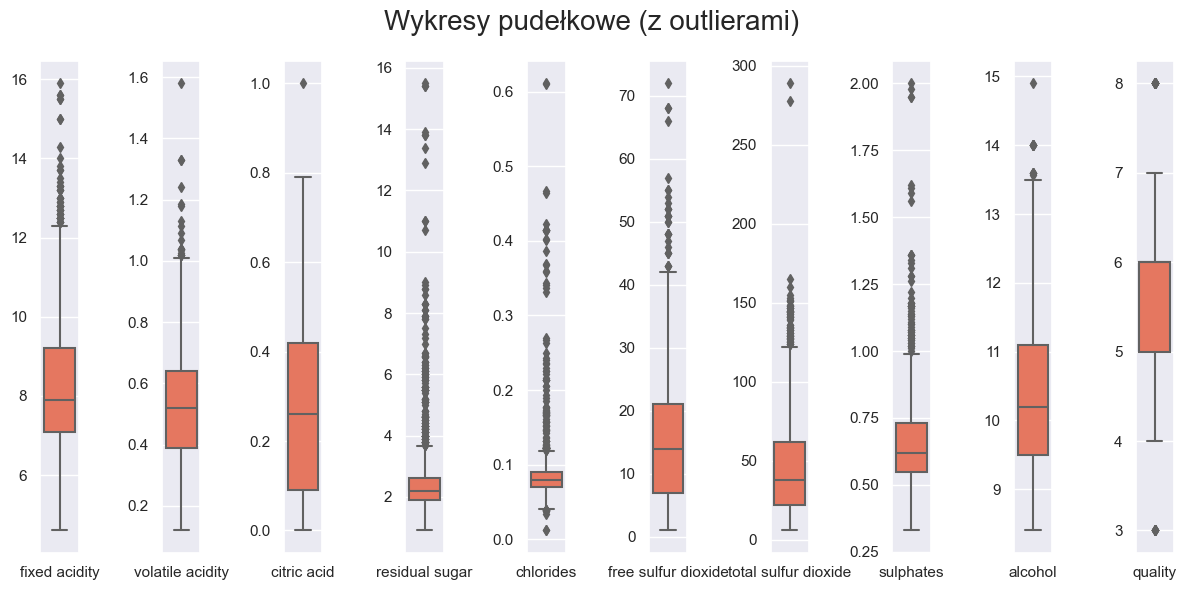

In [23]:
sns.set(rc={"figure.figsize":(12, 6)})
fig, axs = plt.subplots(ncols=len(df.columns))
for col, ax in zip(df.columns, axs):
    sns.boxplot(df[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe (z outlierami)', fontsize=20)    
plt.tight_layout()

Aby przystąpić do analizy i spełnić założenia niektórych z metod uczenia maszynowego usunięto większość wartości odstających.  
Ze zbioru danych usunięto obserwacje na podstawie wartości kwartyli Q1 oraz Q3. Dla każdej zmiennej zostawiono obserwacje z przedziału (0.5*Q1 , 1.5*Q3). Ze zbioru liczącego 1599 obserwacji po usunięciu outlierów zostało 952 obserwacji, co jest wystarczającą ilością do przeprowadzenia procesu uczenia maszynowego.

In [24]:
def remove_outliers(df, col):
    low_threshold = df[col].quantile(0.25)*0.25
    high_threshold = df[col].quantile(0.75)*1.75

    return df[(low_threshold < df[col]) & (df[col] <high_threshold)]


for col in df.columns:
    if col != 'quality':
        df = remove_outliers(df, col)
df.round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.08,17.0,60.0,0.58,9.8,6
6,7.9,0.60,0.06,1.6,0.07,15.0,59.0,0.46,9.4,5
10,6.7,0.58,0.08,1.8,0.10,15.0,65.0,0.54,9.2,5
16,8.5,0.28,0.56,1.8,0.09,35.0,103.0,0.75,10.5,7
...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.62,0.08,1.9,0.07,28.0,38.0,0.82,9.5,6
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.58,10.5,5
1596,6.3,0.51,0.13,2.3,0.08,29.0,40.0,0.75,11.0,6
1597,5.9,0.64,0.12,2.0,0.08,32.0,44.0,0.71,10.2,5


Poniżej przedstawiono wykresy pudełkowe ilustrujące ilość wartości odstających dla poszczególnych zmiennych po wyfiltrowaniu. Wykresy wskazują na znaczne zmniejszenie liczby wartości odstających.

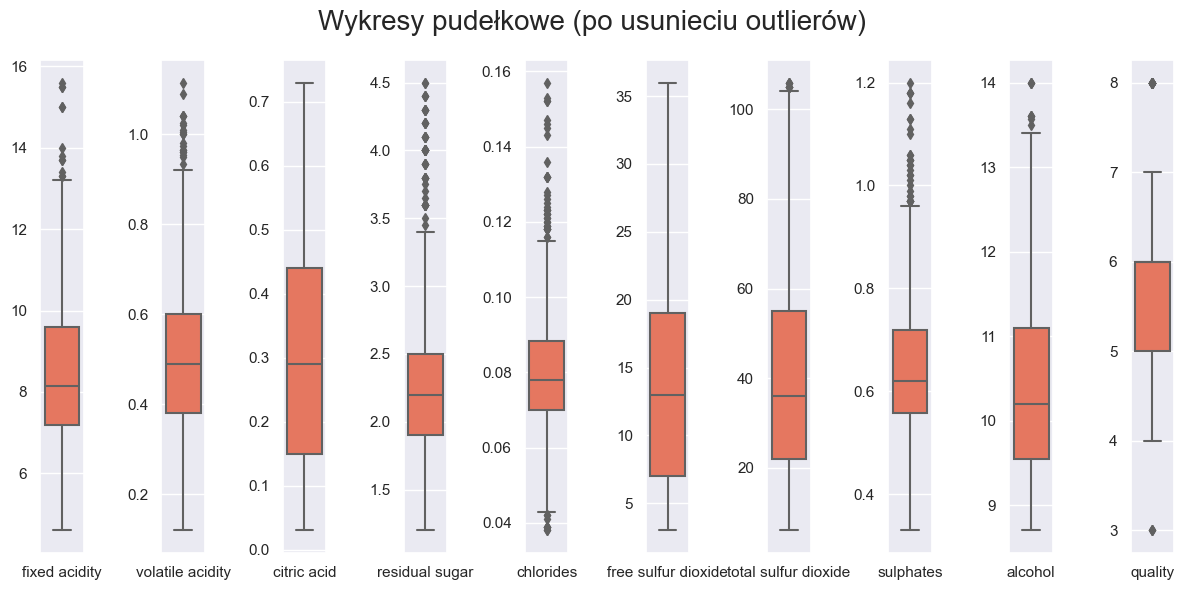

In [25]:
fig, axs = plt.subplots(ncols=len(df.columns))
for col, ax in zip(df.columns, axs):
    sns.boxplot(df[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe (po usunieciu outlierów)', fontsize=20) 
plt.tight_layout()

### Zależności między zmiennymi
#### Korelacja i współliniowość
Macierz wskazuje na wartość współczynnika korelacji poszczególnych czynników ze 
zmienną opisującą jakość wina. Niektóre z nich wykazują mały wpływ na zmienną zależną 
oraz wysokie korelacje między sobą. Do stworzenia macierzy korelacji użyto także skali 
ciepła, który wizualnie wskazuje na pary, które mogą okazać się źródłem współliniowości w 
dalszej analizie modelu regresji.  

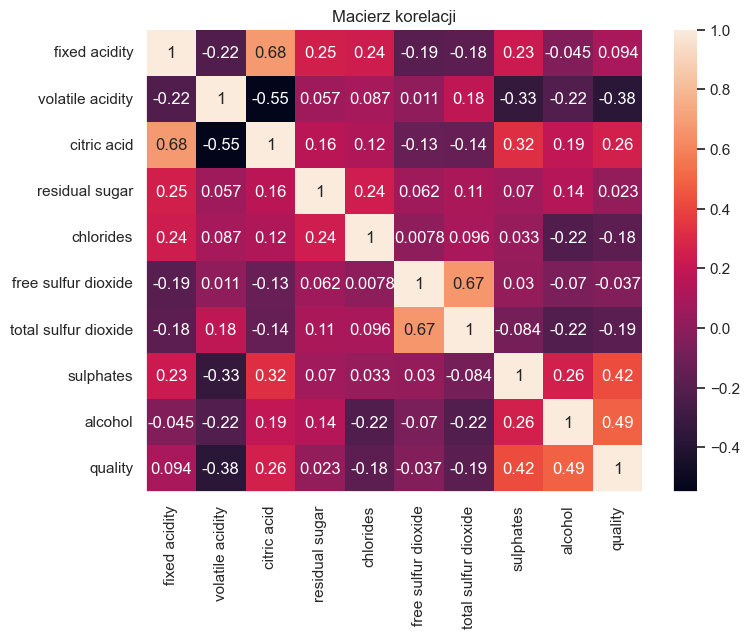

In [26]:
#macierz korelacji - heatmapa
def corr_chart(df):
    corrMatrix = df.corr()
    sns.set(rc={"figure.figsize":(8, 6)})
    sns.heatmap(corrMatrix, annot=True)
    plt.title('Macierz korelacji')
    sns.despine()
    plt.show()
    
corr_chart(df)

Najwyższą korelację ze zmienną jakości wykazują zmienne alcohol oraz sulphates. 
Poza parą zmiennych citric acid i acidity pozostałe zmienne nie wykazują współliniowości. Aby uniknąć zakłamania wyników przez współliniowość ze zbioru danych usunięto zmienną acidity. Decyzję podjęto na podstawie wskaźnika korelacji obu zmiennych ze zmienną objaśnianą (quality).

In [1269]:
#usuwam kolumny
df = df.drop(columns=['acidity'])

df.round(2)

,citric acid,residual sugar,chlorides,sulphates,alcohol,quality,dioxide
3,0.56,1.9,0.08,0.58,9.8,6,38.5
6,0.06,1.6,0.07,0.46,9.4,5,37.0
10,0.08,1.8,0.10,0.54,9.2,5,40.0
20,0.48,1.8,0.08,0.53,9.4,6,44.5
21,0.31,2.3,0.08,0.65,9.7,5,47.0
...,...,...,...,...,...,...,...
1594,0.08,2.0,0.09,0.58,10.5,5,38.0
1595,0.10,2.2,0.06,0.76,11.2,6,45.0
1596,0.13,2.3,0.08,0.75,11.0,6,34.5
1597,0.12,2.0,0.08,0.71,10.2,5,38.0


#### Wykresy zależności
Poniżej przedstawiono macierz wykresów zależności między badanymi zmiennymi.
Wykresy wskazują na niską lub umiarkowaną zależność między zmiennymi, co potwierdza 
również macierz korelacji. 

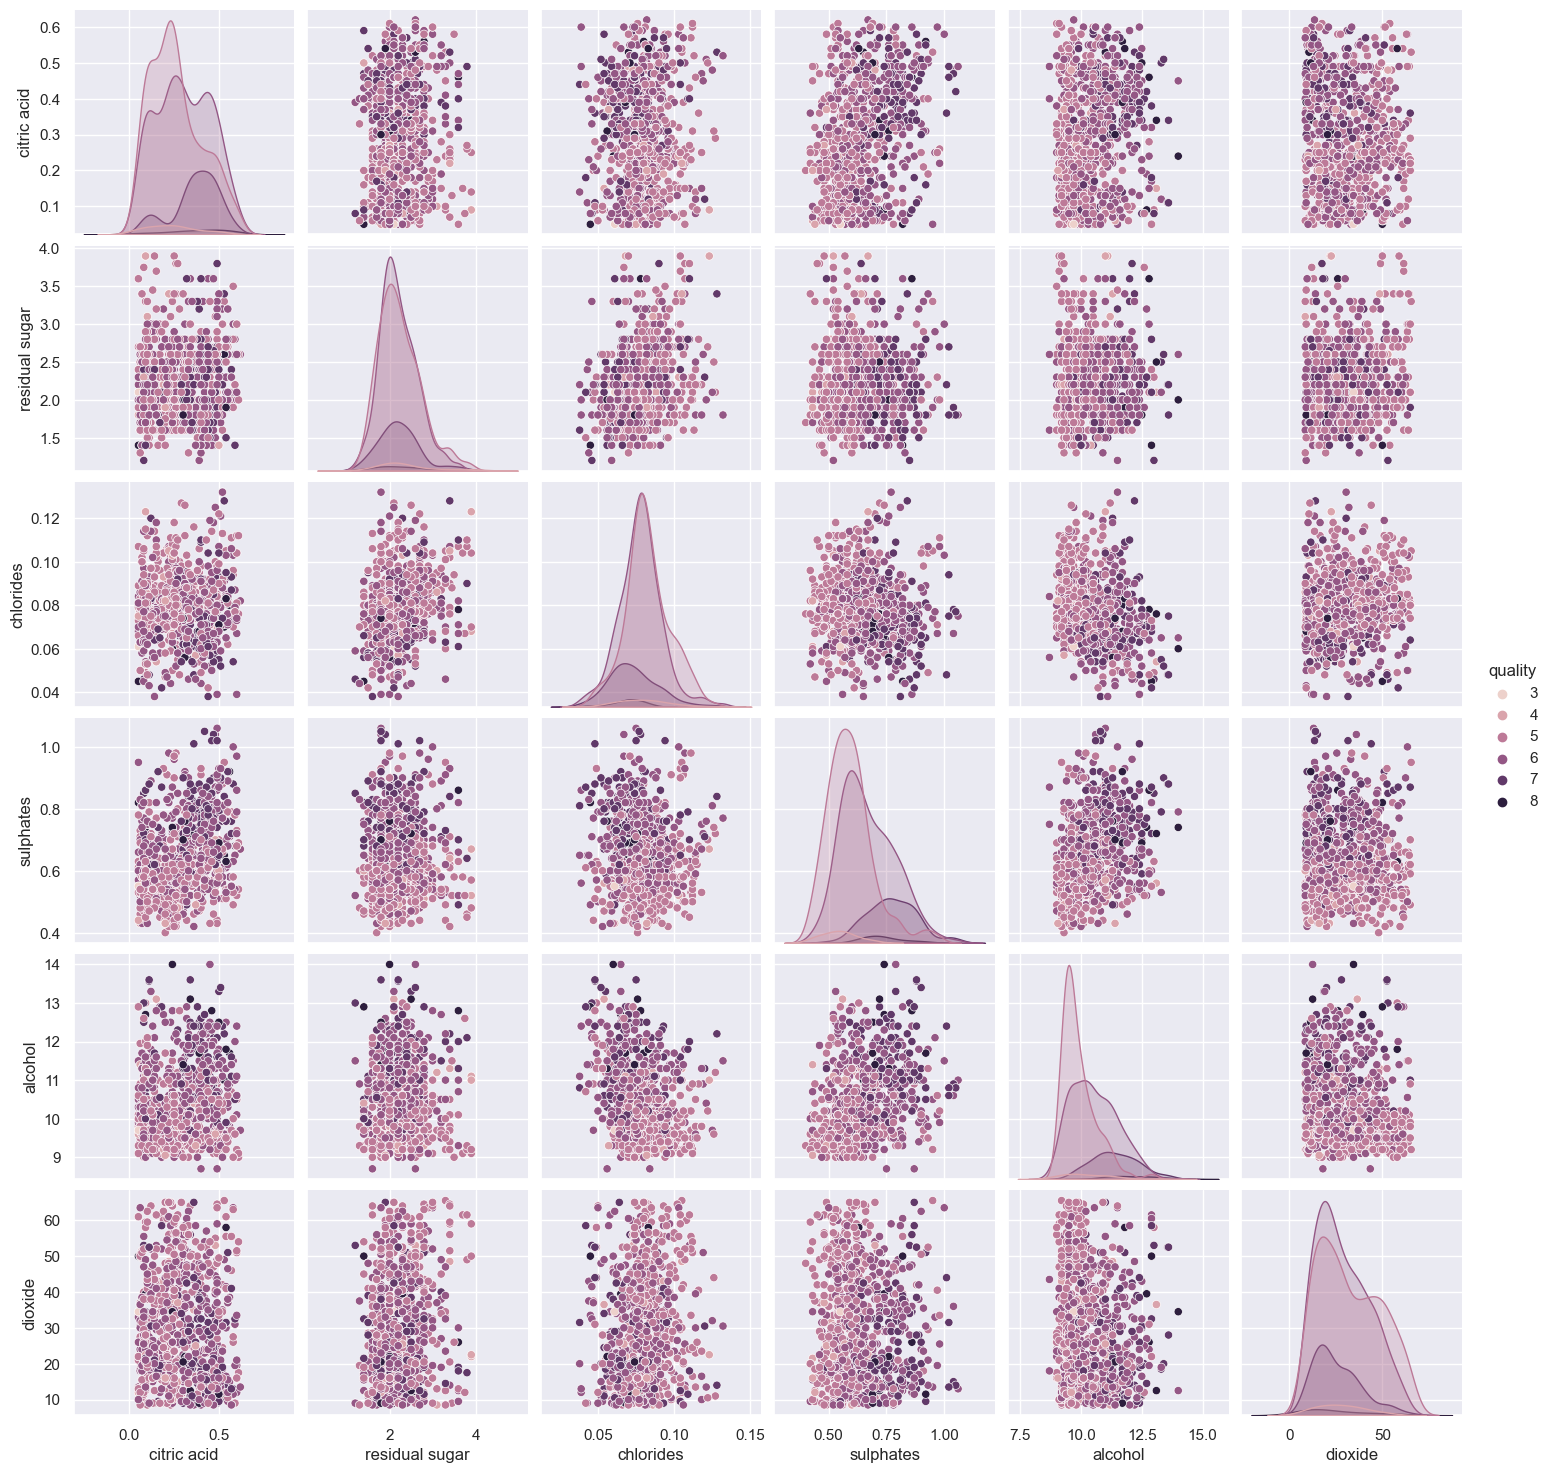

In [1270]:
#wykresy zależności
sns.pairplot(df,hue='quality')

#### Normalność rozkładu
Rozkład normalny jest rozkładem symetrycznym (czyli liczebności odpowiadające wartościom zmiennej rozkładają się symetrycznie wokół liczebności największej). Przyczyną jego znaczenia jest częstość występowania w naturze. Jeśli jakaś wielkość jest sumą lub średnią bardzo wielu drobnych losowych czynników, to niezależnie od rozkładu każdego z tych czynników jej rozkład będzie zbliżony do normalnego (centralne twierdzenie graniczne) – dlatego można go bardzo często zaobserwować w danych.  
Analizowany zbiór danych ze względu na liczebność obserwacji cechuje się rozkładem normalnym.

#### Jednorodność macierzy wariancji-kowariancji
Macierz wariancji-kowariancji to macierz kwadratowa, która zbiera wariancje na głównej przekątnej oraz kowariancje w elementach poza główną przekątną.  

In [1271]:
#macierz wariancji - kowariancji
cov_matrix = df.cov()
cov_matrix.round(3)

,citric acid,residual sugar,chlorides,sulphates,alcohol,quality,dioxide
citric acid,0.022,0.006,0.000,0.005,0.021,0.028,-0.201
residual sugar,0.006,0.224,0.002,-0.001,0.037,-0.012,0.994
chlorides,0.000,0.002,0.000,-0.000,-0.005,-0.002,0.019
sulphates,0.005,-0.001,-0.000,0.015,0.041,0.045,-0.077
alcohol,0.021,0.037,-0.005,0.041,1.001,0.372,-2.403
quality,0.028,-0.012,-0.002,0.045,0.372,0.583,-1.653
dioxide,-0.201,0.994,0.019,-0.077,-2.403,-1.653,226.809


### Podsumowanie analizowanych właściwości zmiennych
W powyższych obliczeniach dokonano analizy i przygotowania zbioru danych do procesu uczenia maszynowego. Dane zostały odpowiednio przekształcone, a zmienne wskazujące na korelacje lub współliniowość zostały usunięte. Ze zbioru danych wyfiltrowano także wartości odstające, które mogłyby zaburzać niektóre z metod uczenia maszynowego.  
Dane otrzymane po wstępnej analizie cechują się odpowiednią zmiennością, znikomą ilością wartości odstających oraz brakiem współliniowości między sobą.  
Ponadto ze względu na znaczną liczność obserwacji zbiór danych cechuje się rozkładem normalnym oraz jednorodną macierzą wariancji-kowariancji.

## Uczenie Maszynowe - Machine Learning
### Definicja Machine Learning
Uczenie maszynowe to dziedzina informatyki, która ma na celu naukę komputerów, jak uczyć się i działać bez konieczności bezpośredniego programowania. Uczenie maszynowe to podejście do analizy danych, które polegające na budowaniu i dostosowywaniu modeli, które pozwalają programom "uczyć się" poprzez doświadczenie. Uczenie maszynowe obejmuje budowę algorytmów, które dostosowują modele, aby poprawić ich zdolność do prognozowania.

### Rodzaje Uczenia Maszynowego
#### Nauka pod nadzorem
Ten rodzaj uczenia maszynowego wprowadza wejściowe i wyjściowe dane historyczne do algorytmów uczenia maszynowego, z przetwarzaniem pomiędzy każdą parą wejście/wyjście, które pozwala algorytmowi przesunąć model, aby stworzyć wyjścia jak najbliższe pożądanemu rezultatowi. Powszechne algorytmy używane podczas uczenia nadzorowanego obejmują sieci neuronowe, drzewa decyzyjne, regresję liniową i maszyny wektorów wsparcia.

##### Przykłady zastosowania: 
* Przewidywanie cen nieruchomości
* Klasyfikowanie, czy transakcje bankowe są oszustwem czy nie
* Znajdowanie czynników ryzyka chorób
* Określanie, czy wnioskodawcy o pożyczkę są niskiego czy wysokiego ryzyka
* Przewidywanie awarii części mechanicznych urządzeń przemysłowych

#### Nauka bez nadzoru
Podczas gdy uczenie nadzorowane wymaga, aby użytkownicy pomagali maszynie w uczeniu się, uczenie bez nadzoru nie używa tych samych etykietowanych zestawów treningowych i danych. Zamiast tego, maszyna szuka mniej oczywistych wzorców w danych.
Ten rodzaj uczenia maszynowego jest szeroko stosowany do tworzenia modeli predykcyjnych.

##### Przykłady zastosowania: 
* Tworzenie grup klientów na podstawie zachowań zakupowych
* Grupowanie zapasów w zależności od sprzedaży i/lub metryk produkcyjnych

#### Uczenie przez wzmacnianie
Typ uczenia maszynowego najbardziej zbliżony do tego, jak uczą się ludzie. Wykorzystywany algorytm lub agent uczy się poprzez interakcję z otoczeniem i otrzymywanie pozytywnej lub negatywnej nagrody.

##### Przykłady zastosowania: 
* Nauczenie samochodów samodzielnego parkowania i autonomicznej jazdy
* Dynamiczne sterowanie sygnalizacją świetlną w celu zmniejszenia korków ulicznych
* Szkolenie robotów w zakresie uczenia się zasad przy użyciu surowych obrazów wideo jako danych wejściowych, które mogą być wykorzystane do replikacji działań, które widzą

## Zastosowanie wybranych technik uczenia maszynowego pod nadzorem

### Metoda Najbliższych Sąsiadów

#### Specyfikacja metody
KNN jest prostym, nadzorowanym algorytmem uczenia maszynowego (ML), który może być używany do zadań klasyfikacji lub regresji - i jest również często używany w imputacji brakujących wartości. Opiera się on na idei, że obserwacje najbliższe danemu punktowi danych są najbardziej "podobnymi" obserwacjami w zbiorze danych, a zatem możemy sklasyfikować nieprzewidziane punkty na podstawie wartości najbliższych istniejących punktów. Wybierając K, użytkownik może wybrać liczbę pobliskich obserwacji do wykorzystania w algorytmie.

#### Przygotowanie danych
W metodzie najbliższych sąsiadów zmienne powinny zostać przekształcone na ilościowe oraz ustandaryzowane.  
Nie ma dodatkowych założeń, które należałoby zweryfikować przed przystąpieniem do wykorzystania danej metody.
W analizowanej metodzie zbiór uczący składa się z 80% wszystkich obserwacji. Model jest testowany na pozostałych 20% wszystkich obserwacji.  
  
Poniżej przedstawiono ustandaryzowany zbiór danych.

In [27]:
#standaryzacja zmiennych
scaler = StandardScaler()

standardized_data = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)
standardized_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,-0.406990,1.552087,-1.510792,0.048640,0.712629,0.089288,0.540622,0.011152,-0.614114,-0.858795
1,1.503063,-1.317295,1.495102,-0.660002,-0.291178,0.332012,0.788963,-0.515543,-0.614114,0.398526
2,-0.350812,0.595626,-1.395181,-1.191484,-0.645462,0.089288,0.747573,-1.418450,-0.999027,-0.858795
3,-1.024948,0.476069,-1.279570,-0.837163,1.007866,0.089288,0.995913,-0.816512,-1.191483,-0.858795
4,-0.013744,-1.317295,1.495102,-0.837163,0.712629,2.516529,2.568739,0.763574,0.059484,1.655846
...,...,...,...,...,...,...,...,...,...,...
1115,-0.968770,0.715184,-1.279570,-0.660002,-0.704510,1.666994,-0.121621,1.290269,-0.902798,0.398526
1116,-1.305838,0.595626,-1.279570,-0.482842,0.594534,2.152443,0.126720,-0.515543,0.059484,-0.858795
1117,-1.249660,0.057617,-0.990541,0.048640,-0.232130,1.788356,-0.038840,0.763574,0.540625,0.398526
1118,-1.474372,0.864631,-1.048347,-0.482842,-0.291178,2.152443,0.126720,0.462605,-0.229201,-0.858795


In [28]:
#okreslam zmienne objasniające i zmienną objaśnianą
X = standardized_df.drop(['quality'], axis=1)
y = df['quality'] 

In [29]:
#tworzę zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

Poniżej przedstawiono wykresy pudełkowe dla zbioru uczącego i testowego, które ilustrują rozłożenie obserwacji po podziale na dwa zbiory. Na ich podstawie można stwierdzić, że w każdym ze zbiorów obserwacje mają podobne właściwości - średnia, odchylenie czy ilość nielicznych wartości odstających są do siebie zbliżone.

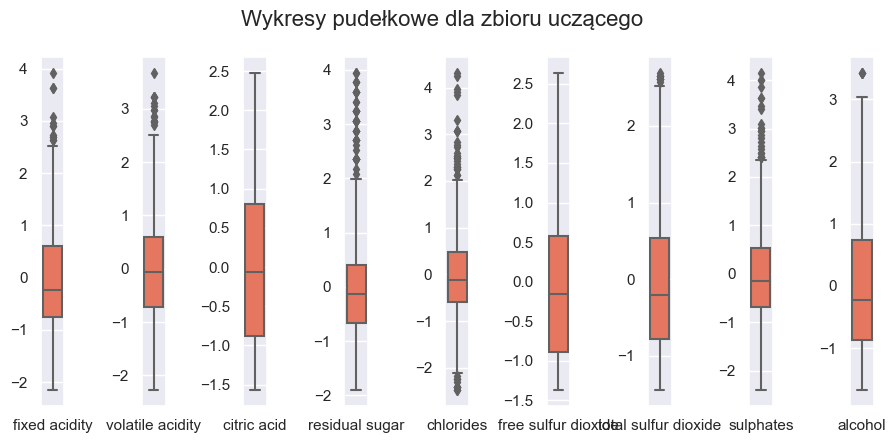

In [30]:
sns.set(rc={"figure.figsize":(9, 4.5)})
fig, axs = plt.subplots(ncols=len(X_train.columns))
for col, ax in zip(X_train.columns, axs):
    sns.boxplot(X_train[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe dla zbioru uczącego', fontsize=16) 
plt.tight_layout()

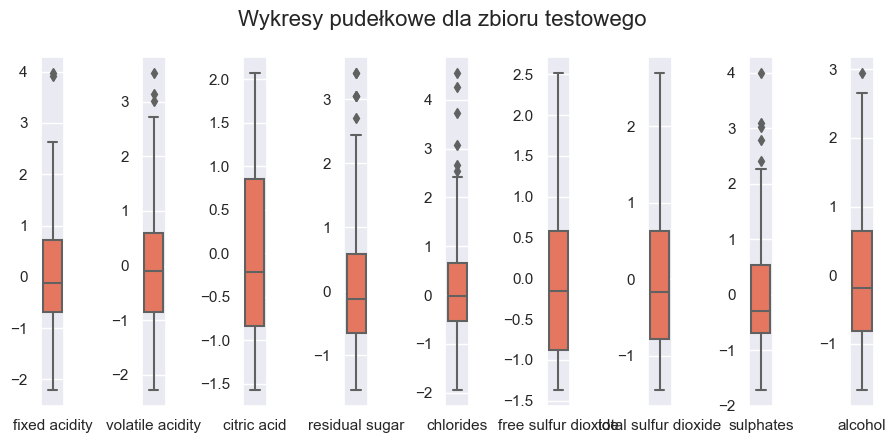

In [31]:
sns.set(rc={"figure.figsize":(9, 4.5)})
fig, axs = plt.subplots(ncols=len(X_test.columns))
for col, ax in zip(X_test.columns, axs):
    sns.boxplot(X_test[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe dla zbioru testowego', fontsize=16) 
plt.tight_layout()

In [32]:
#wskaznik accuracy na zbiorze uczącym dla różnych wartości k 
k=20
score=np.empty((k, 3))

for i in range(0,k):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    score[i,0]=i+1
    y_pred_train = knn.predict(X_train)
    score[i,1]=round(accuracy_score(y_train, y_pred_train),2)
    y_pred_test = knn.predict(X_test)
    score[i,2]=round(accuracy_score(y_test, y_pred_test),2)

score=pd.DataFrame(score, columns=['number of neighbors','accuracy_train','accuracy_test'])
score=score.set_index('number of neighbors')

Porównano również wartości dokładności dopasowania modelu dla zbioru uczącego i testowego. Na zbiorze uczącym wraz ze wzrostem parametru k (liczby najbliższych sąsiadów) wartość wskaźnika accuracy spada. W zbiorze testowym również można zaobserwować spadki, ale ogólnie wartości wykazują trend wzrostowy wraz ze wzrostem liczby najbliższych sąsiadów.

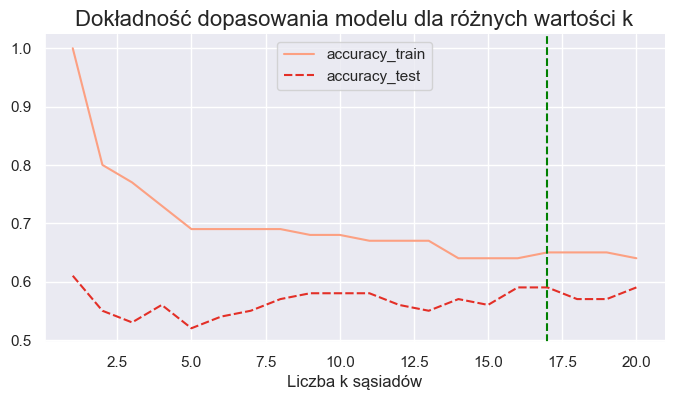

In [1278]:
#wykresy do accuracy
sns.set(rc={"figure.figsize":(8, 4)})
plt.title('Dokładność dopasowania modelu dla różnych wartości k', fontsize=16)
plt.xlabel('Liczba k sąsiadów')
sns.despine()
sns.lineplot(score, palette="Reds")
plt.axvline(17, color='green', linestyle="--");

Optymalna liczba k sąsiadów została wyznaczona na podstawie przedstawionych wyżej wartości dokładności. Najwyższą wartość wskaźnika accuracy w zbiorze testowym otrzymano dla k=17, dlatego szczegółowe analizy zostaną przedstawione dla tej wartości.

In [33]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
y_pred = knn.predict(X_test)

In [34]:
def calculate_metrics(cm):
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    return {
        "accuracy": round(accuracy, 2),
        "sensitivity": round(sensitivity, 2),
        "specificity": round(specificity, 2)
    }

#### Interpretacja wyników uczenia 
**Dokładność (ang. accuracy)** mówi nam o tym, jaka część zbioru testowego została prawidłowo przypisana.  
**Czułość (ang. recall, sensivity, true positive rate)** to miara zasięgu/pokrycia, która bada, w jakiej części klasa pozytywna została pokryta przewidywaniem pozytywnym.  
**Specyficzność (ang. specificity, true negative rate)** to miara pokrycia pokazująca, w jakiej części klasa negatywna jest pokryta prognozą negatywną.  

In [35]:
mcm=multilabel_confusion_matrix(y_test, y_pred)

knn_results=pd.DataFrame([calculate_metrics(cm) for cm in mcm], index=[4,5,6,7,8])
knn_results

,accuracy,sensitivity,specificity
4,0.97,1.00,0.00
5,0.71,0.71,0.71
6,0.61,0.61,0.60
7,0.86,0.96,0.17
8,0.99,1.00,0.00


W metodzie najbliższych sąsiadów dla k=17 podsumowano miary dokładności, czułości i specyficzności predykcji dla każdej z klas z osobna.  
Najlepsze wyniki uzyskano dla klas, w których jakość jest najlepsza (wartość: 8) lub najgorsza (wartość: 4).  
W tych przypadkach ponad 97% obserwacji ze zbioru testowego została poprawnie przypisana. Obie klasy w całości zostałe pokryte przewidywaniem pozytywnym. Wysokie wartości dla tych grup prawdopodobnie są spowodowane ich małą liczebnością. 
Dla pozostałych wartości wskaźnik accuracy wynosi conajmniej 64%, co świadczy o dosyć wysokim stopniu dokładności. 
Dla klas jakości równych 5 i 6 wartości czułości i specyficzności utrzymują się na podobnym poziomie. 
W klasie jakości 7 wskaźnik czułości jest bliski 1.  

Obliczone wskaźniki wskazują na dosyć dokładną klasyfikację jakości w analizowanym zbiorze danych.

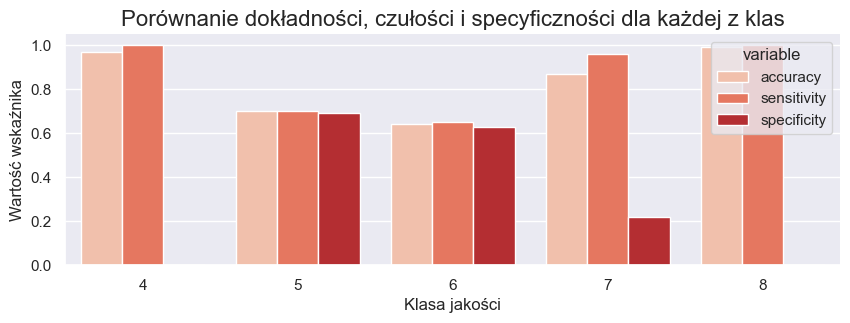

In [1282]:
df_knn_results = pd.melt(knn_results, ignore_index=False)
df_knn_results['class'] = df_knn_results.index
sns.set(rc={"figure.figsize":(10, 3)})
sns.barplot(data=df_knn_results, y="value", hue="variable", x="class", palette="Reds")
plt.title('Porównanie dokładności, czułości i specyficzności dla każdej z klas', fontsize=16)
plt.xlabel('Klasa jakości')
plt.ylabel('Wartość wskaźnika')
sns.despine()

### Metoda Regresji Logistycznej
#### Specyfikacja metody
Regresja logistyczna to proces modelowania prawdopodobieństwa wystąpienia konkretnego wyniku przy uwzględnieniu zmiennej wejściowej.

#### Przygotowanie danych
Do uczenia maszynowego za pomocą metody regresji logistycznej można użyć zarówno danych ilościowych jak i kategorycznych. Standaryzacja zbioru danych oraz weryfikacja dodatkowych założeń nie jest konieczna.  
W analizowanej metodzie zbiór uczący składa się z 80% wszystkich obserwacji. Model jest testowany na pozostałych 20% wszystkich obserwacji.

In [1283]:
X = df.drop(columns=['quality'])
y = df['quality'] 

In [1284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

Poniżej przedstawiono wykresy pudełkowe dla zbioru uczącego i testowego, które ilustrują rozłożenie obserwacji po podziale na dwa zbiory. Na ich podstawie można stwierdzić, że w każdym ze zbiorów obserwacje mają podobne właściwości - średnia, odchylenie czy ilość nielicznych wartości odstających są do siebie zbliżone.

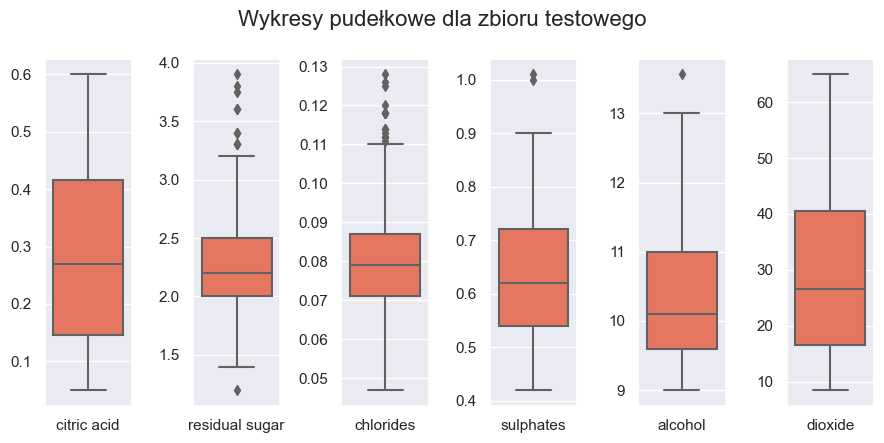

In [1285]:
sns.set(rc={"figure.figsize":(9, 4.5)})
fig, axs = plt.subplots(ncols=len(X_test.columns))
for col, ax in zip(X_test.columns, axs):
    sns.boxplot(X_test[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe dla zbioru testowego', fontsize=16) 
plt.tight_layout()

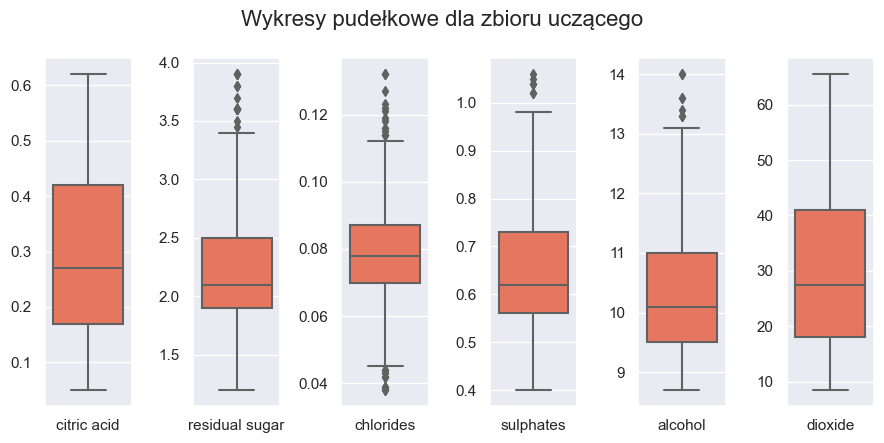

In [1286]:
sns.set(rc={"figure.figsize":(9, 4.5)})
fig, axs = plt.subplots(ncols=len(X_train.columns))
for col, ax in zip(X_train.columns, axs):
    sns.boxplot(X_train[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe dla zbioru uczącego', fontsize=16) 
plt.tight_layout()

In [1287]:
model = LogisticRegression(solver='liblinear', random_state=43)
model=model.fit(X_train, y_train)

#### Interpretacja wyników uczenia 
**Dokładność (ang. accuracy)** mówi nam o tym, jaka część zbioru testowego została prawidłowo przypisana.  
**Czułość (ang. recall, sensivity, true positive rate)** to miara zasięgu/pokrycia, która bada, w jakiej części klasa pozytywna została pokryta przewidywaniem pozytywnym.  
**Specyficzność (ang. specificity, true negative rate)** to miara pokrycia pokazująca, w jakiej części klasa negatywna jest pokryta prognozą negatywną.  

In [1288]:
mcm=multilabel_confusion_matrix(y_test, y_pred)

logr_results=pd.DataFrame([calculate_metrics(cm) for cm in mcm], index=[4,5,6,7,8])
logr_results

,accuracy,sensitivity,specificity
4,0.97,1.00,0.00
5,0.70,0.70,0.69
6,0.64,0.65,0.63
7,0.87,0.96,0.22
8,0.99,1.00,0.00


W metodzie regresji liniowej podsumowano miary dokładności, czułości i specyficzności predykcji dla każdej z klas z osobna.
Otrzymane wyniki są niemal identyczne jak dla metody najbliższych sąsiadów.  
Najlepsze wyniki uzyskano dla klas, w których jakość jest najlepsza (wartość: 8) lub najgorsza (wartość: 4).  
W tych przypadkach ponad 97% obserwacji ze zbioru testowego została poprawnie przypisana. Obie klasy w całości zostałe pokryte przewidywaniem pozytywnym.  Wysokie wartości dla tych grup prawdopodobnie są spowodowane ich małą liczebnością. 
Dla pozostałych wartości wskaźnik accuracy wynosi conajmniej 59%, co świadczy o dosyć wysokim stopniu dokładności. 
Dla klas jakości równych 5 i 6 wartości czułości i specyficzności utrzymują się na podobnym poziomie, a dla klasy jakości równej 5 specyficzność przewyższa czułość.
W klasie jakości 7 wskaźnik czułości jest równy 1.  

Obliczone wskaźniki wskazują na dosyć dokładną klasyfikację jakości w analizowanym zbiorze danych.

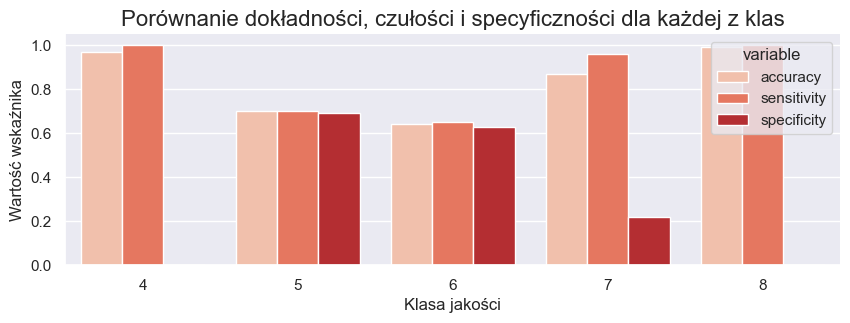

In [1289]:
df_logr_results = pd.melt(logr_results, ignore_index=False)
df_logr_results['class'] = df_logr_results.index
sns.set(rc={"figure.figsize":(10, 3)})
sns.barplot(data=df_logr_results, y="value", hue="variable", x="class", palette="Reds")
plt.title('Porównanie dokładności, czułości i specyficzności dla każdej z klas', fontsize=16)
plt.xlabel('Klasa jakości')
plt.ylabel('Wartość wskaźnika')
sns.despine()

## Liniowa Analiza Dyskryminacyjna
#### Specyfikacja metody
Jest to metoda geometryczna, która koncentruje się na znalezieniu takiego kierunku rzutowania punktów na hiperpłaszczyznę, by jednocześnie: maksymalizować odległość między średnimi w grupach oraz minimalizować wariancję wewnątrzgrupową.

#### Przygotowanie danych
Do uczenia maszynowego za pomocą metody liniowej analizy dyskryminacyjnej można użyć zarówno danych ilościowych jak i kategorycznych. Standaryzacja zbioru danych oraz weryfikacja dodatkowych założeń nie jest konieczna.  
W analizowanej metodzie zbiór uczący składa się z 80% wszystkich obserwacji. Model jest testowany na pozostałych 20% wszystkich obserwacji.

#### Założenia dla zmiennych ilościowych
* Wielowymiarowy rozkład normalny w grupach,
* Jednorodność macierzy wariancji-kowariancji w grupach,
* Brak współliniowości zmiennych,
* Brak wartości odstających.
Każde z powyższych założeń zostało zweryfikowane na etapie przygotowania danych do procesu uczenia maszynowego.

In [1290]:
X = df.drop(columns=['quality'])
y = df['quality'] 

In [1291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

Poniżej przedstawiono wykresy pudełkowe dla zbioru uczącego i testowego, które ilustrują rozłożenie obserwacji po podziale na dwa zbiory. Na ich podstawie można stwierdzić, że w każdym ze zbiorów obserwacje mają podobne właściwości - średnia, odchylenie czy ilość nielicznych wartości odstających są do siebie zbliżone.

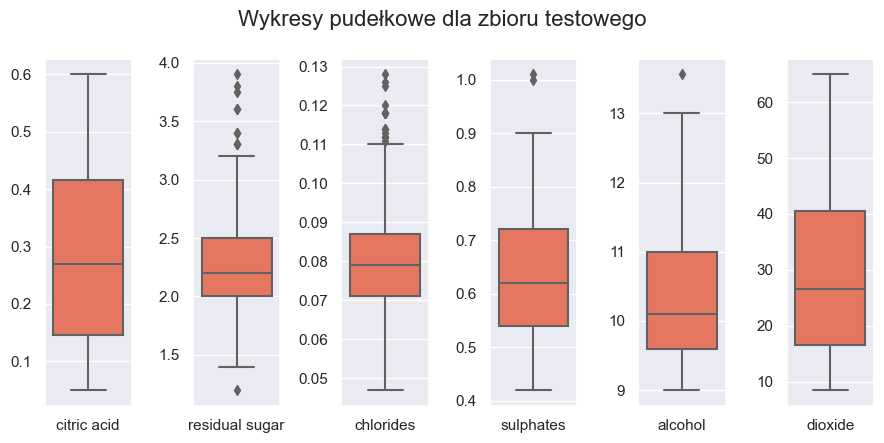

In [1292]:
sns.set(rc={"figure.figsize":(9, 4.5)})
fig, axs = plt.subplots(ncols=len(X_test.columns))
for col, ax in zip(X_test.columns, axs):
    sns.boxplot(X_test[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe dla zbioru testowego', fontsize=16) 
plt.tight_layout()

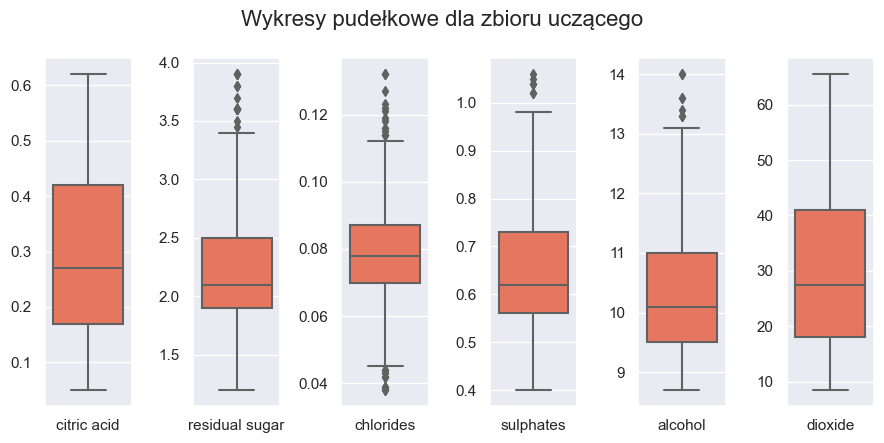

In [1293]:
sns.set(rc={"figure.figsize":(9, 4.5)})
fig, axs = plt.subplots(ncols=len(X_train.columns))
for col, ax in zip(X_train.columns, axs):
    sns.boxplot(X_train[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe dla zbioru uczącego', fontsize=16) 
plt.tight_layout()

In [1294]:
lda = LDA()
X_train = lda.fit(X_train, y_train)

#### Interpretacja wyników uczenia 
**Dokładność (ang. accuracy)** mówi nam o tym, jaka część zbioru testowego została prawidłowo przypisana.  
**Czułość (ang. recall, sensivity, true positive rate)** to miara zasięgu/pokrycia, która bada, w jakiej części klasa pozytywna została pokryta przewidywaniem pozytywnym.  
**Specyficzność (ang. specificity, true negative rate)** to miara pokrycia pokazująca, w jakiej części klasa negatywna jest pokryta prognozą negatywną.  

In [1295]:
y_pred=lda.predict(X_test)

mcm=multilabel_confusion_matrix(y_test, y_pred)

lda_results=pd.DataFrame([calculate_metrics(cm) for cm in mcm], index=[4,5,6,7,8])
lda_results

,accuracy,sensitivity,specificity
4,0.97,1.00,0.00
5,0.71,0.67,0.76
6,0.65,0.72,0.54
7,0.90,0.96,0.43
8,0.98,0.99,0.00


W metodzie liniowej analizy dyskryminacyjnej podsumowano miary dokładności, czułości i specyficzności predykcji dla każdej z klas z osobna.
Otrzymane wyniki są niemal identyczne jak dla metody najbliższych sąsiadów i metody regresji logistycznej. 
Najlepsze wyniki uzyskano dla klas, w których jakość jest najlepsza (wartość: 8) lub najgorsza (wartość: 4).  
W tych przypadkach ponad 97% obserwacji ze zbioru testowego została poprawnie przypisana. Obie klasy w całości zostałe pokryte przewidywaniem pozytywnym.  Wysokie wartości dla tych grup prawdopodobnie są spowodowane ich małą liczebnością. 
Dla pozostałych wartości wskaźnik accuracy wynosi conajmniej 65%, co świadczy o dosyć wysokim stopniu dokładności. 
Dla klas jakości równych 5 i 6 wartości czułości i specyficzności utrzymują się na podobnym poziomie, a dla klasy jakości równej 5 specyficzność przewyższa czułość.
W klasie jakości 7 wskaźnik czułości jest bliski 1.  

Obliczone wskaźniki wskazują na dosyć dokładną klasyfikację jakości w analizowanym zbiorze danych.

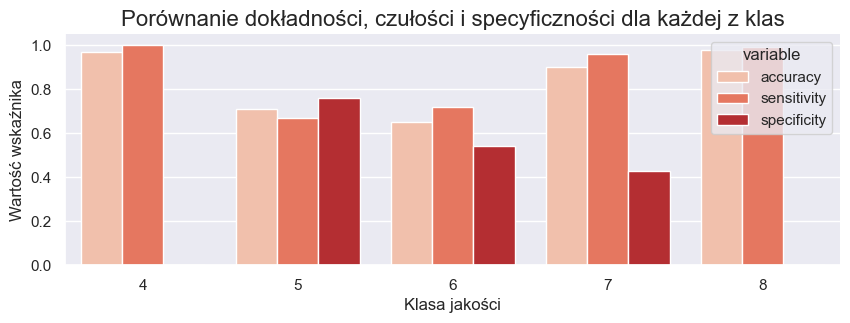

In [1296]:
df_lda_results = pd.melt(lda_results, ignore_index=False)
df_lda_results['class'] = df_lda_results.index
sns.set(rc={"figure.figsize":(10, 3)})
sns.barplot(data=df_lda_results, y="value", hue="variable", x="class", palette="Reds")
plt.title('Porównanie dokładności, czułości i specyficzności dla każdej z klas', fontsize=16)
plt.xlabel('Klasa jakości')
plt.ylabel('Wartość wskaźnika')
sns.despine()

## Klasyfikator Naiwny Bayesa
#### Specyfikacja metody
Metoda naiwna Bayesa jest schematem, który klasyfikuje przypadki opierając się na tw. Bayesa. Jest to typ klasyfikacji statystycznej, których chce przewidzieć prawdopodobieństwo przynależności obiektu do klasy.   

#### Przygotowanie danych
Do uczenia maszynowego za pomocą metody klasyfikatora naiwnego Bayesa dane należy przekszałcić na kategoryczne, jeżeli nie są normalne w grupach. Standaryzacja zbioru danych oraz weryfikacja dodatkowych założeń nie jest konieczna.  
W analizowanej metodzie zbiór uczący składa się z 80% wszystkich obserwacji. Model jest testowany na pozostałych 20% wszystkich obserwacji.  
  
W analizowanym zbiorze danych istnieje rozkład normalny, zatem dyskretyzacja zmiennych nie jest konieczna.

In [1297]:
X = df.drop(columns=['quality'])
y = df['quality'] 

In [1298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=43)

Poniżej przedstawiono wykresy pudełkowe dla zbioru uczącego i testowego, które ilustrują rozłożenie obserwacji po podziale na dwa zbiory. Na ich podstawie można stwierdzić, że w każdym ze zbiorów obserwacje mają podobne właściwości - średnia, odchylenie czy ilość nielicznych wartości odstających są do siebie zbliżone.

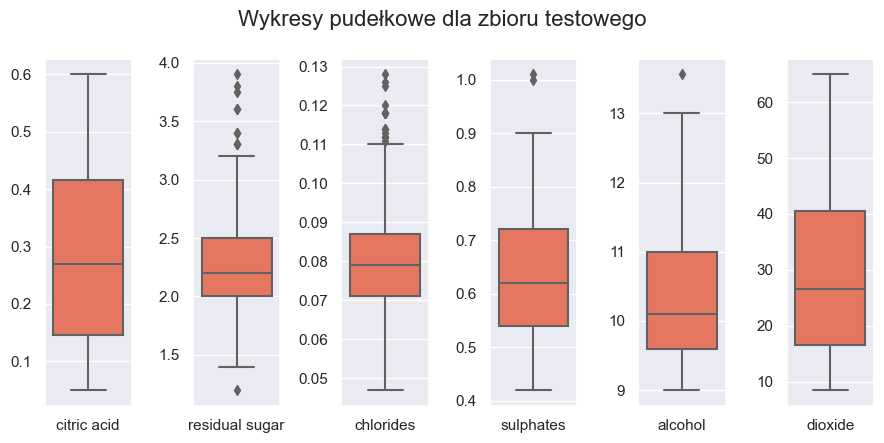

In [1299]:
sns.set(rc={"figure.figsize":(9, 4.5)})
fig, axs = plt.subplots(ncols=len(X_test.columns))
for col, ax in zip(X_test.columns, axs):
    sns.boxplot(X_test[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe dla zbioru testowego', fontsize=16) 
plt.tight_layout()

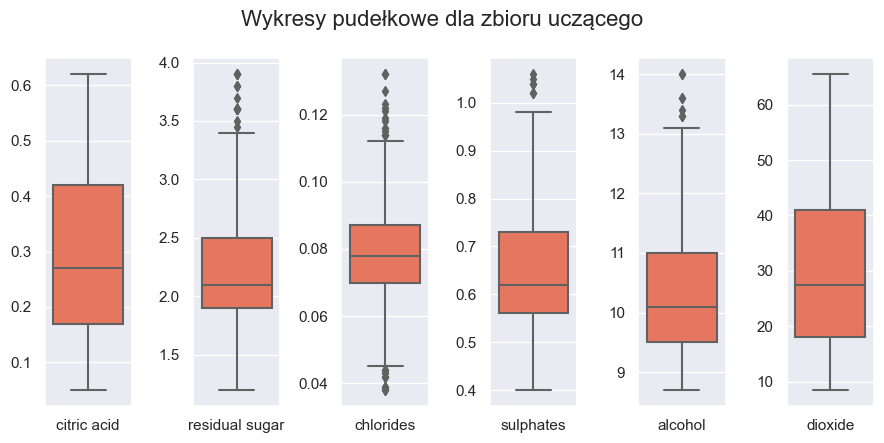

In [1300]:
sns.set(rc={"figure.figsize":(9, 4.5)})
fig, axs = plt.subplots(ncols=len(X_train.columns))
for col, ax in zip(X_train.columns, axs):
    sns.boxplot(X_train[[col]], ax=ax, palette="Reds")
fig.suptitle('Wykresy pudełkowe dla zbioru uczącego', fontsize=16) 
plt.tight_layout()

In [1301]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

#### Interpretacja wyników uczenia 
**Dokładność (ang. accuracy)** mówi nam o tym, jaka część zbioru testowego została prawidłowo przypisana.  
**Czułość (ang. recall, sensivity, true positive rate)** to miara zasięgu/pokrycia, która bada, w jakiej części klasa pozytywna została pokryta przewidywaniem pozytywnym.  
**Specyficzność (ang. specificity, true negative rate)** to miara pokrycia pokazująca, w jakiej części klasa negatywna jest pokryta prognozą negatywną.  

In [1302]:
mcm=multilabel_confusion_matrix(y_test, y_pred)

bayes_results=pd.DataFrame([calculate_metrics(cm) for cm in mcm],index=[4,5,6,7,8])
bayes_results

,accuracy,sensitivity,specificity
4,0.97,0.99,0.00
5,0.70,0.63,0.78
6,0.66,0.77,0.47
7,0.91,0.96,0.57
8,0.98,0.99,0.00


W metodzie opartej na klasyfikatorze naiwnym Bayesa podsumowano miary dokładności, czułości i specyficzności predykcji dla każdej z klas z osobna.
Otrzymane wyniki są zbliżone do wyników otrzymanych przy zastosowaniu pozostałych metod. 
Najlepsze wyniki uzyskano dla klas, w których jakość jest najlepsza (wartość: 8) lub najgorsza (wartość: 4).  
W tych przypadkach ponad 97% obserwacji ze zbioru testowego została poprawnie przypisana. Obie klasy prawie w całości zostałe pokryte przewidywaniem pozytywnym.  Wysokie wartości dla tych grup prawdopodobnie są spowodowane ich małą liczebnością. 
Dla pozostałych wartości wskaźnik accuracy wynosi conajmniej 66%, co świadczy o dosyć wysokim stopniu dokładności. 

Obliczone wskaźniki wskazują na dosyć dokładną klasyfikację jakości w analizowanym zbiorze danych.

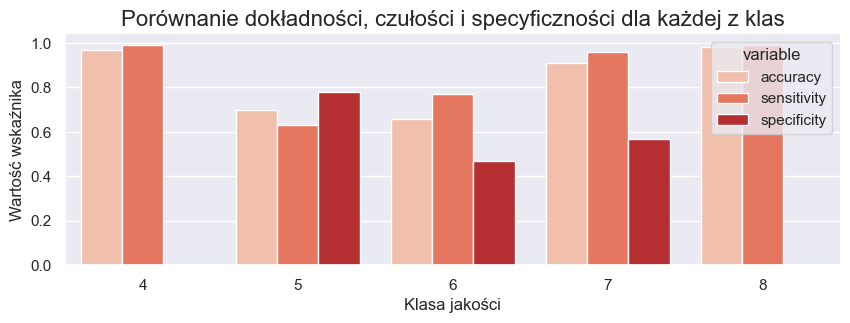

In [1303]:
df_bayes_results = pd.melt(bayes_results, ignore_index=False)
df_bayes_results['class'] = df_bayes_results.index
sns.set(rc={"figure.figsize":(10, 3)})
sns.barplot(data=df_bayes_results, y="value", hue="variable", x="class", palette="Reds")
plt.title('Porównanie dokładności, czułości i specyficzności dla każdej z klas', fontsize=16)
plt.xlabel('Klasa jakości')
plt.ylabel('Wartość wskaźnika')
sns.despine()

## Podsumowanie
### Porównanie analizowanych metod uczenia maszynowego
#### Accuracy = dokładność
Wartości wskaźnika accuracy w przedstawionych metodach są niemal identyczne.  
Dla klas jakości 4 i 8 wartość wskaźnika jest bliska 1. Co oznacza, że modele niemal całkowicie poprawnie rozpoznały obserwacje z tych klas. Dla klasy 7 są nieco gorsze, a wartość wynosi ok. 90%. Modele pomyliły się jedynie w 10% obserwacji ze zbioru testowego.  
Wartości dokładności dla klas 5 i 6 są dużo niższe od pozostałych, a ich wartości oscylują między 65-70%. Modele poprawnie rozpoznały większą część klas jakości. Jednak poziom błędów na poziomie 30% wśród zbioru testowego jest znaczący.  
W badanym zbiorze danych dla wybranych metod wartość wskaźnika accuracy jest powiązana z ilością obserwacji w każdej z klas. Klasy 4 oraz 8 są znacznie mniej liczne niż pozostałe z klas jakości.

In [1304]:
accuracy = pd.DataFrame().assign(KNN=knn_results['accuracy'], LogReg=logr_results['accuracy'],LDA=lda_results['accuracy'],Bayes=bayes_results['accuracy'])
accuracy

,KNN,LogReg,LDA,Bayes
4,0.97,0.97,0.97,0.97
5,0.70,0.70,0.71,0.70
6,0.64,0.64,0.65,0.66
7,0.87,0.87,0.90,0.91
8,0.99,0.99,0.98,0.98


Poniżej przedstawiono również graficzne porównanie wartości wskaźnika accuracy dla wybranych metod. Zaprezentowane dane potweirdzają opisane wcześniej wnioski.

In [1305]:
df_accuracy = pd.melt(accuracy, ignore_index=False)
df_accuracy['class'] = df_accuracy.index

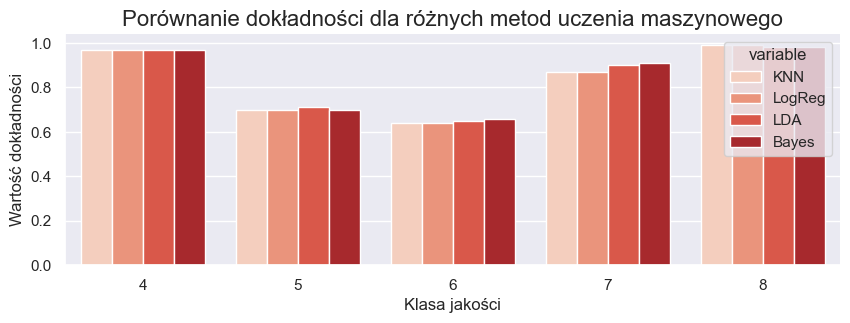

In [1306]:
sns.set(rc={"figure.figsize":(10, 3)})
sns.barplot(data=df_accuracy, y="value", hue="variable", x="class", palette="Reds")
plt.title('Porównanie dokładności dla różnych metod uczenia maszynowego', fontsize=16)
plt.xlabel('Klasa jakości')
plt.ylabel('Wartość dokładności')
sns.despine()

#### Sensitivity = czułość
Wartości wskaźnika sensitivity w przedstawionych metodach są do siebie zbliżone.  
Dla klas jakości 4 i 8 wartość wskaźnika jest równa 1. Co oznacza, że modele całkowicie poprawnie rozpoznały obserwacje należące do danej klasy. Dla klasy 7 są minimalnie gorsze, a wartość wynosi 96%. Modele rozpoznały 96% obserwacji, któe powinny należeć do tej klasy jakości.
Wartości czułości dla klas 5 i 6 są dużo niższe od pozostałych, a ich wartości oscylują między 63-77%. Modele poprawnie rozpoznały większą część obserwacji, które powinny zostać zaklasyfikowane do wybranych klas jakości.  
W badanym zbiorze danych dla wybranych metod wartość wskaźnika czułość, podobnie jak dokładność, jest powiązana z ilością obserwacji w każdej z klas. Klasy 4 oraz 8 są znacznie mniej liczne niż pozostałe z klas jakości.

In [1307]:
sensitivity = pd.DataFrame().assign(KNN=knn_results['sensitivity'], LogReg=logr_results['sensitivity'],LDA=lda_results['sensitivity'],Bayes=bayes_results['sensitivity'])
sensitivity

,KNN,LogReg,LDA,Bayes
4,1.00,1.00,1.00,0.99
5,0.70,0.70,0.67,0.63
6,0.65,0.65,0.72,0.77
7,0.96,0.96,0.96,0.96
8,1.00,1.00,0.99,0.99


Poniżej przedstawiono również graficzne porównanie wartości wskaźnika sensitivity dla wybranych metod. Zaprezentowane dane potweirdzają opisane wcześniej wnioski.

In [1308]:
df_sensitivity = pd.melt(sensitivity, ignore_index=False)
df_sensitivity['class'] = df_sensitivity.index

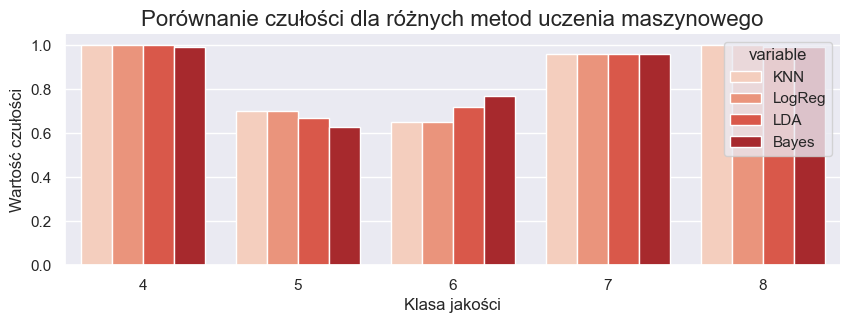

In [1309]:
sns.set(rc={"figure.figsize":(10, 3)})
sns.barplot(data=df_sensitivity, y="value", hue="variable", x="class", palette="Reds")
plt.title('Porównanie czułości dla różnych metod uczenia maszynowego', fontsize=16)
plt.xlabel('Klasa jakości')
plt.ylabel('Wartość czułości')
sns.despine()

#### Specificity = specyficzność
Róźnice w wartościach wskaźnika specificity w przedstawionych metodach są zauważalne.
Dla klas jakości 4 i 8 wartość wskaźnika jest równa 0. Co oznacza, że modele całkowicie poprawnie rozpoznały obserwacje nienależące do danej klasy. Dla klasy 7 są gorsze, a wartość wynosi 22-57%. Modele rozpoznały połowę lub mniej obserwacji, któe nie powinny należeć do tej klasy jakości.
Wartości czułości dla klas 5 i 6 są znacznie wyższe od pozostałych, a ich wartości oscylują między 63-%. Modele poprawnie rozpoznały większą część obserwacji, które powinny zostać zaklasyfikowane do wybranych klas jakości.  
Najwyższe wartości wskaźnika specificity osiąga model zbudowany na podstawie klasyfikatora naiwnego Bayesa. Dla metody najbliższych sąsiadów i metody regresji logistycznej wartości są jednakowe i porównywalne z metodą liniowej analizy dyskryminacyjnej.  
W badanym zbiorze danych dla wybranych metod wartość wskaźnika czułość, podobnie jak dokładność, jest powiązana z ilością obserwacji w każdej z klas. Klasy 4 oraz 8 są znacznie mniej liczne niż pozostałe z klas jakości.

In [1310]:
specificity = pd.DataFrame().assign(KNN=knn_results['specificity'], LogReg=logr_results['specificity'],LDA=lda_results['specificity'],Bayes=bayes_results['specificity'])
specificity

,KNN,LogReg,LDA,Bayes
4,0.00,0.00,0.00,0.00
5,0.69,0.69,0.76,0.78
6,0.63,0.63,0.54,0.47
7,0.22,0.22,0.43,0.57
8,0.00,0.00,0.00,0.00


Poniżej przedstawiono również graficzne porównanie wartości wskaźnika specificity dla wybranych metod. Zaprezentowane dane potweirdzają opisane wcześniej wnioski.

In [1311]:
df_specificity = pd.melt(specificity, ignore_index=False)
df_specificity['class'] = df_specificity.index

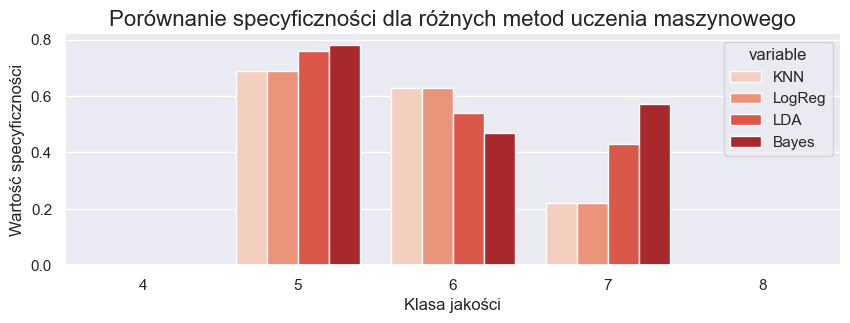

In [1312]:
sns.set(rc={"figure.figsize":(10, 3)})
sns.barplot(data=df_specificity, y="value", hue="variable", x="class", palette="Reds")
plt.title('Porównanie specyficzności dla różnych metod uczenia maszynowego', fontsize=16)
plt.xlabel('Klasa jakości')
plt.ylabel('Wartość specyficzności')
sns.despine()

### Wnioski
Wyniki z analizowanych metod uczenia maszynowego są do siebie zbliżone. Wartości dopasowania modelu są względnie zadowalające, a każdy z modeli rozpoznaje daną klasę w przynajmniej 60%. Wartości wskaźników dokładności i czułości są podobne dla każdej z metod, jednak wskaźnik specyficzności wskazuje na przewagę modelu opartego na klasyfikatorze naiwnym Bayesa.  
Analiza każdej z metod wskazuje, że najniższym stopniem dopasowania modelu wykazują się najliczniejsze klasy jakości. Prawdopodobnie jest to spowodowane dużym podobieństwem wśród tych klas i brakiem konkretnego schematu oceny jakości.

## Bibliografia:
https://archive.ics.uci.edu/ml/datasets/wine+quality  
https://mfiles.pl/pl/index.php/Wsp%C3%B3%C5%82czynnik_zmienno%C5%9Bci  
https://pl.wikipedia.org/wiki/Obserwacja_odstaj%C4%85ca  
https://deepai.org/machine-learning-glossary-and-terms/machine-learning  
https://www.coursera.org/articles/types-of-machine-learning  
https://www.w3schools.com/python/python_ml_knn.asp  
https://towardsdatascience.com/implementing-k-nearest-neighbors-with-scikit-learn-9e4858e231ea  
https://www.statology.org/sklearn-classification-report/ 
https://en.wikipedia.org/wiki/Sensitivity_and_specificity  
https://www.statology.org/sklearn-classification-report/  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix  
https://realpython.com/logistic-regression-python/  
https://www.folkstalk.com/2022/10/lda-scikit-learn-with-code-examples.html  
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html  
https://analityk.edu.pl/rozklad-normalny-w-python/  
https://mfiles.pl/pl/index.php/Rozk%C5%82ad_normalny  